In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tsod

In [2]:
data = pd.read_csv(r"./data/train_dataset.csv")

In [3]:
data.head()

,time,JS_NH3,CS_NH3,JS_TN,CS_TN,JS_LL,CS_LL,MCCS_NH4,MCCS_NO3,JS_COD,...,B_QY_ORP,N_HYC_NH4,N_HYC_XD,N_HYC_MLSS,N_HYC_JS_DO,N_HYC_DO,N_CS_MQ_SSLL,N_QY_ORP,Label1,Label2
0,2022/1/4 0:00,31.0164,0.0583,36.5537,10.5156,1685.3599,996.0668,0.1639,8.2715,169.3,...,167.3177,0.5787,4.2710,6455.5645,0.5013,2.3087,3010.5042,127.9659,NaN,NaN
1,2022/1/4 0:02,31.0164,0.0583,36.5537,10.5156,1739.0143,874.0959,0.1639,8.3518,169.3,...,167.3177,0.7004,3.3759,6410.8105,0.6029,2.2781,3009.2285,128.2552,NaN,NaN
2,2022/1/4 0:04,31.9567,0.0583,36.5537,10.5156,1729.6257,1324.8105,0.1630,8.3116,169.3,...,167.3177,0.6278,4.0315,6407.2769,0.4522,2.3421,3009.3267,127.9659,NaN,NaN
3,2022/1/4 0:06,31.9567,0.0583,36.5537,10.5156,1665.6812,723.9781,0.1630,8.1999,169.3,...,167.3177,0.6239,4.0315,6401.7803,0.7498,2.2490,3011.3877,128.8339,NaN,NaN
4,2022/1/4 0:08,31.9567,0.0583,36.5537,10.5156,1628.1198,741.2993,0.1630,8.1380,169.3,...,167.3177,0.7024,3.6841,6403.3506,0.5896,2.3268,3013.2522,128.3999,NaN,NaN


In [6]:
data.columns

Index(['time', 'JS_NH3', 'CS_NH3', 'JS_TN', 'CS_TN', 'JS_LL', 'CS_LL',
       'MCCS_NH4', 'MCCS_NO3', 'JS_COD', 'CS_COD', 'JS_SW', 'CS_SW',
       'B_HYC_NH4', 'B_HYC_XD', 'B_HYC_MLSS', 'B_HYC_JS_DO', 'B_HYC_DO',
       'B_CS_MQ_SSLL', 'B_QY_ORP', 'N_HYC_NH4', 'N_HYC_XD', 'N_HYC_MLSS',
       'N_HYC_JS_DO', 'N_HYC_DO', 'N_CS_MQ_SSLL', 'N_QY_ORP', 'Label1',
       'Label2'],
      dtype='object')

<AxesSubplot:xlabel='time'>

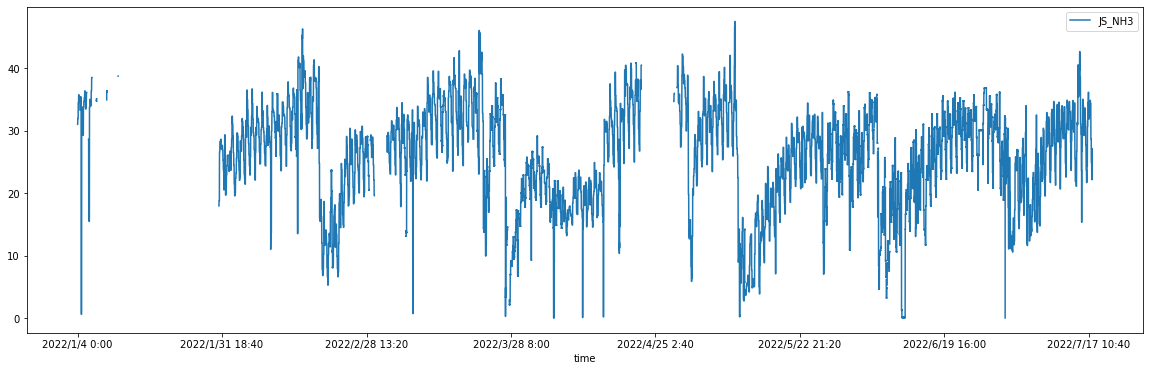

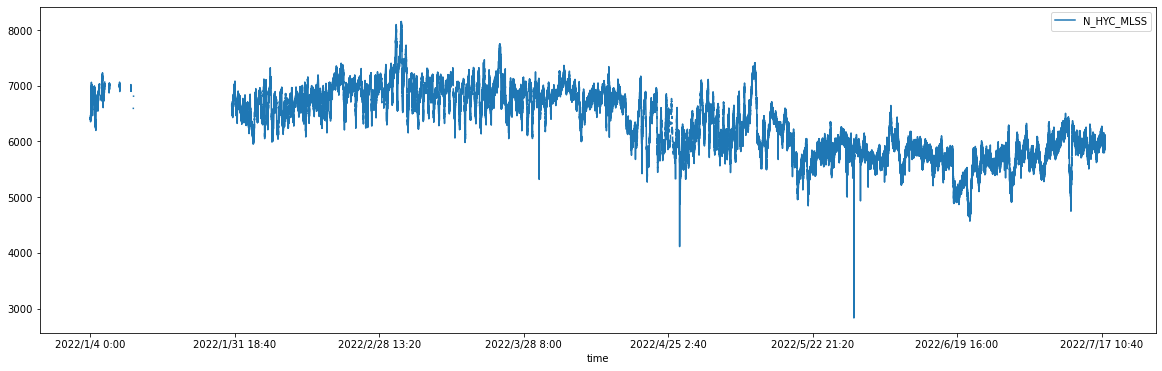

In [11]:
data.plot(x='time', y='JS_NH3', figsize=(20, 6))
data.plot(x='time', y='N_HYC_MLSS', figsize=(20, 6))

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140480 entries, 0 to 140479
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time          140480 non-null  object 
 1   JS_NH3        113979 non-null  float64
 2   CS_NH3        113493 non-null  float64
 3   JS_TN         113979 non-null  float64
 4   CS_TN         113593 non-null  float64
 5   JS_LL         120761 non-null  float64
 6   CS_LL         120971 non-null  float64
 7   MCCS_NH4      120974 non-null  float64
 8   MCCS_NO3      120974 non-null  float64
 9   JS_COD        113979 non-null  float64
 10  CS_COD        120595 non-null  float64
 11  JS_SW         112368 non-null  float64
 12  CS_SW         112587 non-null  float64
 13  B_HYC_NH4     120975 non-null  float64
 14  B_HYC_XD      120975 non-null  float64
 15  B_HYC_MLSS    120975 non-null  float64
 16  B_HYC_JS_DO   120975 non-null  float64
 17  B_HYC_DO      120975 non-null  float64
 18  B_CS

In [13]:
data.describe()

,JS_NH3,CS_NH3,JS_TN,CS_TN,JS_LL,CS_LL,MCCS_NH4,MCCS_NO3,JS_COD,CS_COD,...,B_QY_ORP,N_HYC_NH4,N_HYC_XD,N_HYC_MLSS,N_HYC_JS_DO,N_HYC_DO,N_CS_MQ_SSLL,N_QY_ORP,Label1,Label2
count,113979.000000,113493.000000,113979.000000,113593.000000,120761.000000,120971.000000,120974.000000,120974.000000,113979.000000,120595.000000,...,120975.000000,120975.000000,120975.000000,120975.000000,120974.000000,120975.000000,121595.000000,120975.000000,35068.000000,35068.000000
mean,25.869322,0.042778,37.195958,10.382582,1536.965675,1258.603597,0.176871,8.835861,181.742216,7.588732,...,143.238806,1.965510,6.332114,6330.126186,0.476089,1.973935,3017.052817,110.881449,13745.474316,11816.071793
std,8.242821,0.059491,11.333081,1.774866,542.636669,876.260360,0.137185,1.376012,71.282348,2.787387,...,27.159936,0.861904,2.325913,563.420820,0.422847,1.174615,139.963259,23.972090,4717.251176,3664.571351
min,0.000000,0.001100,0.000000,0.179300,0.000000,-3447.026900,0.001000,-0.004300,0.000000,0.000000,...,-63.006400,0.099800,0.111600,2831.632800,0.005800,0.074900,0.000000,-136.791100,814.490000,719.710000
25%,20.682050,0.014600,30.755300,9.397000,1120.225300,855.041600,0.129300,8.096800,134.800000,6.100000,...,136.067700,1.367800,4.702800,5858.838400,0.283400,1.045800,3009.522900,99.754000,10498.402500,9269.437500
50%,27.253100,0.039700,37.780700,10.542400,1425.161100,1333.128400,0.159200,9.014800,172.900000,7.800000,...,146.556800,1.931200,6.131800,6368.804200,0.400800,1.682900,3011.485800,115.306800,13071.830000,11159.960000
75%,31.902900,0.057600,44.586900,11.591200,2023.552500,1817.152000,0.214100,9.735200,218.900000,9.100000,...,156.973400,2.539700,7.708000,6809.673800,0.542100,2.619200,3013.546900,124.276600,15359.617500,13203.822500
max,47.504000,1.495900,103.881600,14.493000,5548.713400,3414.167000,5.821600,17.777200,692.700000,25.910000,...,187.789400,8.905400,36.975100,8152.307100,5.189900,8.514700,5000.000000,162.109400,66326.050000,49464.130000


In [36]:
data.drop(['time'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140480 entries, 0 to 140479
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   JS_NH3        113979 non-null  float64
 1   CS_NH3        113493 non-null  float64
 2   JS_TN         113979 non-null  float64
 3   CS_TN         113593 non-null  float64
 4   JS_LL         120761 non-null  float64
 5   CS_LL         120971 non-null  float64
 6   MCCS_NH4      120974 non-null  float64
 7   MCCS_NO3      120974 non-null  float64
 8   JS_COD        113979 non-null  float64
 9   CS_COD        120595 non-null  float64
 10  JS_SW         112368 non-null  float64
 11  CS_SW         112587 non-null  float64
 12  B_HYC_NH4     120975 non-null  float64
 13  B_HYC_XD      120975 non-null  float64
 14  B_HYC_MLSS    120975 non-null  float64
 15  B_HYC_JS_DO   120975 non-null  float64
 16  B_HYC_DO      120975 non-null  float64
 17  B_CS_MQ_SSLL  121595 non-null  float64
 18  B_QY

<AxesSubplot:>

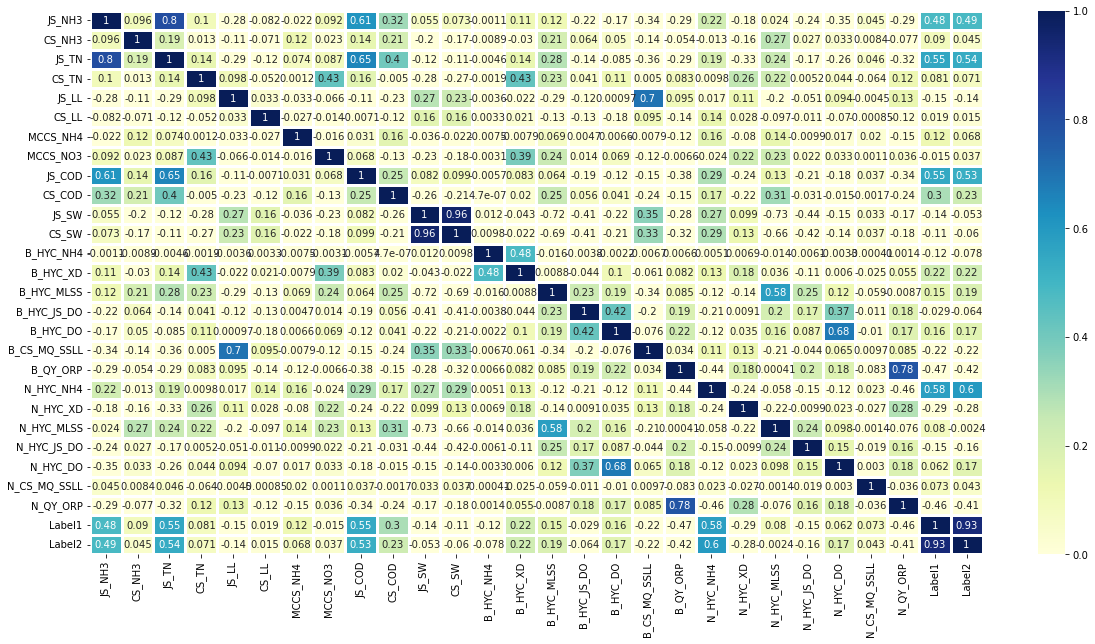

In [46]:
#correlation analysis
plt.subplots(figsize = (20,10))
sns.heatmap(data.drop(['time'], axis=1).astype(float).corr(),vmin = 0, vmax = 1,cmap = 'YlGnBu',annot=True,linewidths=3)

<AxesSubplot:xlabel='time'>

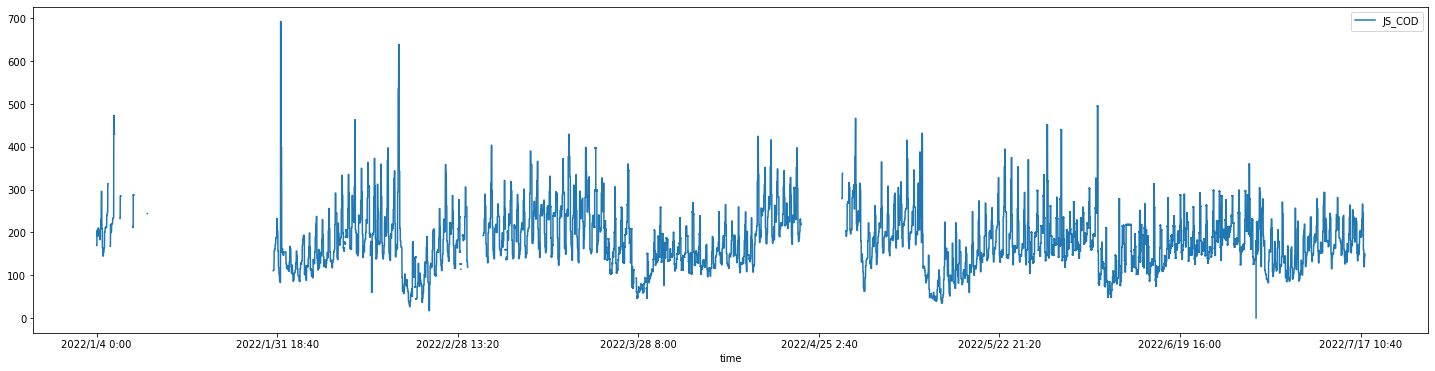

In [43]:
data.plot(x = 'time',y = 'JS_COD',figsize = (25,6))

In [68]:
from tsod import RangeDetector
from tsod import GradientDetector
num = int(len(data['JS_COD'])*0.2)
range_dector = RangeDetector(min_value= np.min(data['JS_COD'][-num:]), max_value =np.max(data['JS_COD'][-num:]))
g_detector = GradientDetector().fit(data['JS_COD'][-num:])
res = gdector.detect(data['JS_COD'])
plt.figure(figsize= (15,5))
plt.plot(data['JS_COD'], label = 'origion')
plt.plot(data['JS_COD'][res], label = 'anomoly')

AttributeError: Can only use .dt accessor with datetimelike values

In [53]:
from adtk.detector import GeneralizedESDTestAD
esd_ad = GeneralizedESDTestAD(alpha = 0.05)
filtered_JS_COD = esd_ad.fit_detect(pd.date_range(data['JS_COD'],freq = 's'))

ValueError: Of the four parameters: start, end, periods, and freq, exactly three must be specified

In [52]:
data['time']

0          2022/1/4 0:00
1          2022/1/4 0:02
2          2022/1/4 0:04
3          2022/1/4 0:06
4          2022/1/4 0:08
               ...      
140475    2022/7/18 2:30
140476    2022/7/18 2:32
140477    2022/7/18 2:34
140478    2022/7/18 2:36
140479    2022/7/18 2:38
Name: time, Length: 140480, dtype: object